### Sai Veerabhadra Hithesh Medavarapu

### <span style="color:blue"> Very good project, well executed!! Did you explore Kaggle to see who has done similar analysis and how yours compare with theirs? It looks like there is more you can explore, given time. Good beginning!

I did look at a some codes in the codes on Kaggle and most of them were are analysis of a single team, player or a league performed. They also explored how various attributes affect the game, how a player's performance decreases after a certain age etc. But, I couldn't find any code with actual predicting and Text feature extraction. 

### <span style="color:blue"> Provide some discussion after the first set of results with NN (48% accuracy). Why do you think the validation accuracy is higher than the trining accuracy? Are the little dips (particularly of of validation accuracy curve) explainable? (I don;t know the answers, but I am asking yo to think about it!   

## Title: Predicting Shot Outcomes in Soccer: An Event-Driven Deep Learning Approach

### SUMMARY:
##### In this project I am predicting the shot outcome of a random event in a soccer match. The attributes I have all in one or other way effect the outcome of whether the shot taken is On target, Off target, Blocked or hit the crossbar. The attributes are: time, side, event type, player name, Team names, location, situation, body part used.

##### This kind of technology is used in Actual soccer matches as they predict the goal outcome based on the shot position, player, defending player's postion and various other attributes.

[![App Platorm](https://d11p0alxbet5ud.cloudfront.net/Pictures/780xany/5/9/2/1361592_pgrealmadridgolbenzema_689483.jpg.png)](https://www.broadcastnow.co.uk/production/laliga-unveils-goal-probability-stats/5166793.article)


### Introduction:
#####  I initially preprocessed the data by removing all the attributes that we don't require, removed rows where data is not available, normalized the data and predicted using a 3 layered Neural Network. Later I tried to predict by taking the commentary of every particular event, extract the text features from them and passing it as an attribute and used another Neural network to predict the shot outcome.

##### Dataset Link : https://www.kaggle.com/datasets/secareanualin/football-events

### Methodology
##### The goal is to determine if a shot will be on target, off target, blocked, or hit the crossbar. First, we cleaned up our data by removing unnecessary details and rows where information was missing. We used a three-layered Neural Network to predict shot outcomes based on the cleaned data. Then, to improve our predictions, we added text from the match's commentary by pulling out important words and phrases using a method called TF-IDF vectorization. This let us use both numbers and words to make better predictions. Throughout the project, we used tools like pandas for organizing our data, sklearn's StandardScaler for making sure our data is on a similar scale, and matplotlib for showing how accurate our models were. This approach provided a thorough way to use advanced machine learning to predict how well shots are taken in soccer.

### Implementation:

##### Importing Libraries

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import hashlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout


##### Importing and reading the CSV file

In [2]:
file_path = '/Users/hitheshmedavarapu/Desktop/TFproject/archive/events.csv'
df = pd.read_csv(file_path)
df.sample(5)

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
176267,KECTNJj8/,KECTNJj8113,113,86,Emilio Nsue (Mallorca) wins a free kick on the...,8,NaN,2,Mallorca,Getafe,...,NaN,NaN,NaN,NaN,0,5.0,NaN,0,NaN,0
872281,0EsQaX8h/,0EsQaX8h12,12,12,Attempt missed. Bernardo Silva (Monaco) left f...,1,12.0,2,AS Monaco,Metz,...,NaN,NaN,9.0,2.0,0,15.0,2.0,1,1.0,0
55445,MgbYX6dp/,MgbYX6dp40,40,27,"Corner, Marseille. Conceded by Livio Nabab.",2,NaN,2,Marseille,Caen,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
357916,6JChlxAK/,6JChlxAK29,29,39,"Substitution Substitution, Sunderland. Va...",7,NaN,2,Sunderland,Stoke City,...,valentin roberge,emanuele giaccherini,NaN,NaN,0,NaN,NaN,0,NaN,0
751891,GGlvO3QA/,GGlvO3QA66,66,67,Foul by John Obi Mikel (Chelsea).,3,NaN,2,Chelsea,Crystal Palace,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0


In [3]:
df.shape

(941009, 22)

In [4]:
df = df.drop(columns=['sort_order','id_event','id_odsp','is_goal','assist_method','player_in', 'player_out', 'event_type2','fast_break','shot_place'])
df.shape

(941009, 12)

##### Target Column

In [5]:
df.iloc[0:100,8]

0     2.0
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
95    NaN
96    2.0
97    NaN
98    NaN
99    NaN
Name: shot_outcome, Length: 100, dtype: float64

##### Dropped all the rows with empty values

In [6]:
df = df.dropna()
df.shape

(167798, 12)

In [7]:
target = df.iloc[:, 8]

attributes = df.drop(df.columns[8], axis=1)

print("Features Preview:")
print(attributes.head())
print("\nTarget Preview:")
print(target.head())

Features Preview:
    time                                               text  event_type  side  \
0      2  Attempt missed. Mladen Petric (Hamburg) left f...           1     2   
11    14  Attempt missed. Shinji Kagawa (Borussia Dortmu...           1     1   
13    17  Goal!  Borussia Dortmund 1, Hamburg 0. Kevin G...           1     1   
18    25  Shinji Kagawa (Borussia Dortmund) hits the rig...           1     1   
22    26  Attempt saved. Mats Hummels (Borussia Dortmund...           1     1   

           event_team           opponent             player          player2  \
0          Hamburg SV  Borussia Dortmund      mladen petric      gokhan tore   
11  Borussia Dortmund         Hamburg SV      shinji kagawa      mario gotze   
13  Borussia Dortmund         Hamburg SV  kevin grosskreutz      mario gotze   
18  Borussia Dortmund         Hamburg SV      shinji kagawa  lukasz piszczek   
22  Borussia Dortmund         Hamburg SV       mats hummels       chris lowe   

    location  

##### Attributes

In [8]:
features = attributes
features.sample(10)

,time,text,event_type,side,event_team,opponent,player,player2,location,bodypart,situation
541069,67,Attempt saved. Nemanja Matic (Chelsea) left fo...,1,2,Chelsea,Sunderland,nemanja matic,cesc fabregas,15.0,2.0,1.0
561701,88,Attempt missed. Gareth McAuley (West Bromwich ...,1,1,West Brom,Manchester City,gareth mcauley,chris brunt,3.0,3.0,3.0
327006,20,Attempt saved. Salomon Kalou (Lille) right foo...,1,2,Lille,Lyon,salomon kalou,nolan roux,15.0,1.0,1.0
111806,82,Attempt missed. Tomer Hemed (Mallorca) header ...,1,2,Mallorca,Sporting Gijon,tomer hemed,marti,3.0,3.0,3.0
292095,61,Attempt saved. Zhi Gin Lam (Hamburg) right foo...,1,1,Hamburg SV,VfL Wolfsburg,zhi gin lam,heiko westermann,15.0,1.0,1.0
662860,75,Attempt saved. Wayne Routledge (Swansea City) ...,1,2,Swansea,Chelsea,wayne routledge,jonjo shelvey,3.0,1.0,1.0
551354,12,Attempt saved. Joselu (Hannover 96) right foot...,1,2,Hannover 96,Werder Bremen,joselu,hiroshi kiyotake,11.0,1.0,1.0
182012,76,Attempt saved. Stephan El Shaarawy (Milan) hea...,1,2,AC Milan,Lazio,stephan el shaarawy,urby emanuelson,3.0,3.0,1.0
789769,23,Attempt missed. Marc Albrighton (Leicester Cit...,1,1,Leicester City,Norwich City,marc albrighton,shinji okazaki,15.0,1.0,1.0
732462,64,Attempt missed. Bakary KonA© (Lyon) header fro...,1,2,Lyon,Nantes,bakary kone,arnold mvuemba,3.0,3.0,2.0


In [9]:
features= features.drop('text',axis=1)
features.sample(5)

,time,event_type,side,event_team,opponent,player,player2,location,bodypart,situation
816613,90,1,1,Guingamp,Paris Saint-Germain,jimmy briand,ludovic blas,3.0,3.0,1.0
449946,26,1,1,Aston Villa,Fulham,andreas weimann,marc albrighton,3.0,3.0,1.0
10782,41,1,2,Hamburg SV,Werder Bremen,slobodan rajkovic,marcell jansen,3.0,3.0,3.0
465806,37,1,1,Montpellier,Toulouse,mbaye niang,morgan sanson,15.0,1.0,1.0
725814,52,1,1,Caen,Angers,vincent bessat,julien feret,17.0,2.0,1.0


In [10]:
# Verify the shape of the resulting DataFrame
print("Combined DataFrame Shape:", features.shape)

# Display the first few rows to check the new DataFrame
print(features.head())

Combined DataFrame Shape: (167798, 10)
    time  event_type  side         event_team           opponent  \
0      2           1     2         Hamburg SV  Borussia Dortmund   
11    14           1     1  Borussia Dortmund         Hamburg SV   
13    17           1     1  Borussia Dortmund         Hamburg SV   
18    25           1     1  Borussia Dortmund         Hamburg SV   
22    26           1     1  Borussia Dortmund         Hamburg SV   

               player          player2  location  bodypart  situation  
0       mladen petric      gokhan tore       9.0       2.0        1.0  
11      shinji kagawa      mario gotze      15.0       1.0        1.0  
13  kevin grosskreutz      mario gotze       9.0       2.0        1.0  
18      shinji kagawa  lukasz piszczek       3.0       1.0        1.0  
22       mats hummels       chris lowe       3.0       3.0        1.0  


In [11]:
features.shape
features.sample(5)

,time,event_type,side,event_team,opponent,player,player2,location,bodypart,situation
809879,60,1,2,Watford,Arsenal,nathan ake,troy deeney,3.0,2.0,2.0
607639,79,1,1,Real Sociedad,Espanyol,imanol agirretxe,pablo hervias,8.0,1.0,1.0
46760,19,1,1,Lazio,Parma,djibril cisse,hernanes,3.0,3.0,3.0
498705,38,1,1,FC Augsburg,Werder Bremen,raul bobadilla,sascha molders,15.0,2.0,1.0
285571,47,1,1,Bastia,Toulouse,wahbi khazri,jerome rothen,9.0,1.0,1.0


In [12]:
features.dropna()

,time,event_type,side,event_team,opponent,player,player2,location,bodypart,situation
0,2,1,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,9.0,2.0,1.0
11,14,1,1,Borussia Dortmund,Hamburg SV,shinji kagawa,mario gotze,15.0,1.0,1.0
13,17,1,1,Borussia Dortmund,Hamburg SV,kevin grosskreutz,mario gotze,9.0,2.0,1.0
18,25,1,1,Borussia Dortmund,Hamburg SV,shinji kagawa,lukasz piszczek,3.0,1.0,1.0
22,26,1,1,Borussia Dortmund,Hamburg SV,mats hummels,chris lowe,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...
940979,78,1,1,Atalanta,Sampdoria,ervin zukanovic,alejandro gomez,10.0,3.0,1.0
940991,84,1,1,Atalanta,Sampdoria,alberto grassi,remo freuler,15.0,1.0,1.0
940992,86,1,1,Atalanta,Sampdoria,alejandro gomez,andrea petagna,9.0,1.0,1.0
940993,87,1,2,Sampdoria,Atalanta,fabio quagliarella,luis muriel,15.0,1.0,1.0


In [13]:
print("Type of target:", type(target))
print("Type of combined_df:", type(features))

Type of target: <class 'pandas.core.series.Series'>
Type of combined_df: <class 'pandas.core.frame.DataFrame'>


Encoding using Hashing


In [14]:
def hash_column(text, bucket_size=10000):
    value_str = str(text)
    return int(hashlib.sha256(value_str.encode('utf-8')).hexdigest(), 16) % bucket_size


features['event_team_hash'] = features['event_team'].apply(lambda x: hash_column(x))
features['opponent_hash'] = features['opponent'].apply(lambda x: hash_column(x))
features['player_hash'] = features['player'].apply(lambda x: hash_column(x))
features['player2_hash'] = features['player2'].apply(lambda x: hash_column(x))


In [15]:
features = features.drop(columns=['event_team','opponent','player','player2'])
features.head(5)

,time,event_type,side,location,bodypart,situation,event_team_hash,opponent_hash,player_hash,player2_hash
0,2,1,2,9.0,2.0,1.0,3089,4774,7075,6615
11,14,1,1,15.0,1.0,1.0,4774,3089,8472,229
13,17,1,1,9.0,2.0,1.0,4774,3089,2943,229
18,25,1,1,3.0,1.0,1.0,4774,3089,8472,9070
22,26,1,1,3.0,3.0,1.0,4774,3089,720,6870


In [16]:
features.shape

(167798, 10)

##### Normalization using Standard Scalar

Z = (X−μ)/σ

X : Data Point
μ : mean of the feature
σ : Standard deviation

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
features = scaler.fit_transform(features)

# Print the normalized data
print("Normalized Data:")
print(features)

Normalized Data:
[[-1.79302076  0.          1.11215517 ... -0.05730439  0.71581299
   0.53769029]
 [-1.33737355  0.         -0.89915511 ... -0.65173764  1.20317098
  -1.66619052]
 [-1.22346174  0.         -0.89915511 ... -0.65173764 -0.72567822
  -1.66619052]
 ...
 [ 1.39650973  0.         -0.89915511 ... -1.73124253 -0.89906184
  -0.84206472]
 [ 1.43448033  0.          1.11215517 ...  1.78314561 -1.18128991
  -0.44449649]
 [ 1.66230394  0.          1.11215517 ...  1.78314561 -1.18128991
   1.36595743]]


##### Encoding the Class (categorical)
##### shot_outcome 
1	On target <br/>
2	Off target <br/>
3	Blocked <br/>
4	Hit the bar <br/>

In [18]:
target_encoded = to_categorical(target)[:,1:]
target_encoded

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [19]:
features.shape

(167798, 10)

Splitting the data into Training data and testing data

In [20]:
X = features
y = target_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train[1]

array([ 1.47245093,  0.        , -0.89915511, -0.08882769, -0.89657907,
       -0.35601693,  0.88877416, -0.99957811,  0.70430059, -1.47085752])

#### Multi-layered Neural-network 
 Input Layer with 10 Neurons<br/>
 2 Hidden layers with 64 and 32 Neurons each<br/>
 Output layer with 4 Neurons 

In [22]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(10,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    # Dense(128, activation='relu'),
    Dense(4, activation='sigmoid')
])

/Users/hitheshmedavarapu/Desktop/TFproject/tfvenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model with 'adam' optimizer and 'categorical_crossentropy' loss function. <br/>
<br/>
We also want to track accuracy and loss of the model during training.

In [23]:

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,916 (11.39 KB)

 Trainable params: 2,916 (11.39 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50


1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.4028 - loss: 1.1485 - val_accuracy: 0.4708 - val_loss: 1.0620
Epoch 2/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 342us/step - accuracy: 0.4454 - loss: 1.0766 - val_accuracy: 0.4666 - val_loss: 1.0557
Epoch 3/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step - accuracy: 0.4526 - loss: 1.0682 - val_accuracy: 0.4647 - val_loss: 1.0529
Epoch 4/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step - accuracy: 0.4567 - loss: 1.0650 - val_accuracy: 0.4658 - val_loss: 1.0523
Epoch 5/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step - accuracy: 0.4609 - loss: 1.0634 - val_accuracy: 0.4694 - val_loss: 1.0513
Epoch 6/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step - accuracy: 0.4656 - loss: 1.0591 - val_accuracy: 0.4591 - val_loss: 1.0536
Epoch 7/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step - accuracy: 0.4637 - loss: 1.0566 - val_accuracy: 0.4690 - val_loss: 1.0513
Epoch 8/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 340us/step - accuracy: 0.4666 - loss: 1.05

Evaluate the model 

In [ ]:
results = model.evaluate(X_test, y_test)
print(f"Loss: {results[0]}, Accuracy: {results[1]}")

   1/1049 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.4062 - loss: 0.9910

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 0.4753 - loss: 1.0482
Loss: 1.0528684854507446, Accuracy: 0.4739272892475128


Plot Accuracy graph using Matplotlib 

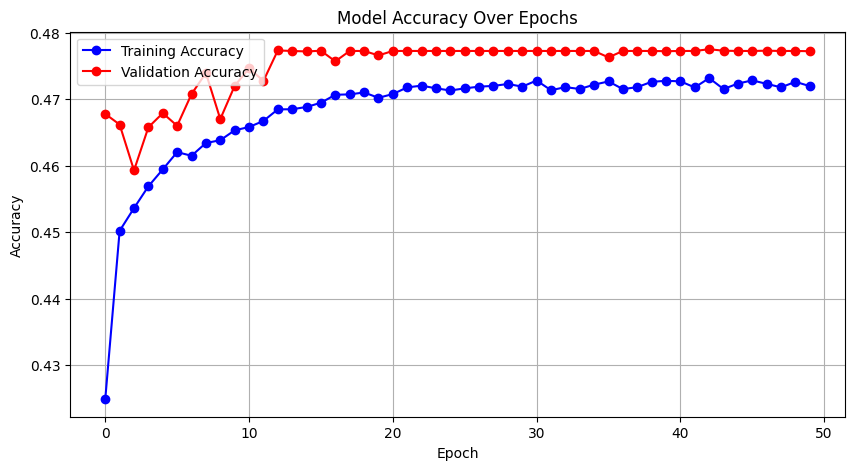

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(history.history['accuracy'], linestyle='-', marker='o', color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], linestyle='-', marker='o', color='r', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()



#### The reason for the dips might be because the model may be sensitive to some particular batches. Maybe some batches may have data which have some features or patterns which might be challenging for the model. Usually same kind of dips are found in Image classification if there is a lot of noise. 

#### Extracting Text features
##### I used Tfid Vectorizer to extract features from the event commentary column in the dataset. n-gram is in range 1 to 2

In [ ]:
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b', ngram_range=(1, 2), max_features=20)

In [ ]:
text_features = vectorizer.fit_transform(attributes['text'])
print(text_features)
text_features.shape 

  (0, 2)	0.13179618864540615
  (0, 5)	0.1787892155388229
  (0, 19)	0.14645174589560084
  (0, 14)	0.1942159801231343
  (0, 10)	0.20623100112501855
  (0, 17)	0.1623239479398301
  (0, 8)	0.1623239479398301
  (0, 6)	0.13179618864540615
  (0, 1)	0.13179618864540615
  (0, 11)	0.1705196620157567
  (0, 4)	0.1417303791249939
  (0, 13)	0.1942159801231343
  (0, 18)	0.3982500457317227
  (0, 9)	0.13179618864540615
  (0, 16)	0.1623239479398301
  (0, 7)	0.1623239479398301
  (0, 12)	0.6512992573999873
  (0, 3)	0.14758017500615334
  (1, 15)	0.5243339620719333
  (1, 2)	0.18456709184724882
  (1, 5)	0.2503760230459569
  (1, 19)	0.20509070189144243
  (1, 17)	0.22731809862138166
  (1, 8)	0.22731809862138166
  (1, 6)	0.18456709184724882
  :	:
  (167796, 4)	0.18800286947170472
  (167796, 13)	0.2576241013806036
  (167796, 18)	0.5282717214689079
  (167796, 9)	0.17482533951961257
  (167796, 16)	0.21531987838507086
  (167796, 7)	0.21531987838507086
  (167796, 3)	0.1957625214127457
  (167797, 0)	0.2677717419060959

(167798, 20)

We gotta convert it to a dataframe and then combine with rest of data

In [ ]:
text_df = pd.DataFrame(text_features.toarray(), columns=vectorizer.get_feature_names_out())

# Reset the index of both DataFrames if they've been altered
attributes.reset_index(drop=True, inplace=True)
text_df.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames along columns
features_with_text = pd.concat([attributes, text_df], axis=1)

#### Multi-layered Neural-network 
 Input Layer with 20 Neurons<br/>
 2 Hidden layers with 64 and 32 Neurons each<br/>
 Output layer with 4 Neurons 

In [ ]:
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(30,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='sigmoid')
])

/Users/hitheshmedavarapu/Desktop/TFproject/tfvenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:

features_with_text['event_team_hash'] = features_with_text['event_team'].apply(lambda x: hash_column(x))
features_with_text['opponent_hash'] = features_with_text['opponent'].apply(lambda x: hash_column(x))
features_with_text['player_hash'] = features_with_text['player'].apply(lambda x: hash_column(x))
features_with_text['player2_hash'] = features_with_text['player2'].apply(lambda x: hash_column(x))

features_with_text = features_with_text.drop(columns=['event_team','opponent','player','player2','text'])

features_with_text.sample(5)

,time,event_type,side,location,bodypart,situation,a,assisted,assisted by,attempt,...,of the,right,shot,shot from,the,the box,event_team_hash,opponent_hash,player_hash,player2_hash
64985,88,1,1,15.0,1.0,1.0,0.000000,0.184567,0.184567,0.206671,...,0.000000,0.524334,0.227318,0.227318,0.371806,0.205091,9261,377,7229,6186
155262,48,1,1,3.0,3.0,3.0,0.553106,0.152627,0.152627,0.170906,...,0.224912,0.000000,0.000000,0.000000,0.461195,0.169599,7771,2506,6650,7657
8531,59,1,1,15.0,2.0,1.0,0.304447,0.168022,0.168022,0.188144,...,0.000000,0.000000,0.206940,0.206940,0.338475,0.186705,7177,1247,4315,4744
93638,41,1,1,15.0,2.0,1.0,0.000000,0.218453,0.218453,0.244615,...,0.000000,0.000000,0.269053,0.269053,0.220034,0.242745,4170,5143,5098,9333
95716,18,1,2,15.0,1.0,1.0,0.000000,0.222172,0.222172,0.248780,...,0.000000,0.315583,0.273634,0.273634,0.223780,0.246878,2479,2459,3156,5844


In [ ]:
features_with_text = scaler.fit_transform(features_with_text)

In [ ]:
X = features_with_text
y = target_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
history = model2.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.7559 - loss: 0.5265 - val_accuracy: 0.8104 - val_loss: 0.3548
Epoch 2/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.8060 - loss: 0.3653 - val_accuracy: 0.8121 - val_loss: 0.3487
Epoch 3/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.8092 - loss: 0.3585 - val_accuracy: 0.8081 - val_loss: 0.3465
Epoch 4/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.8105 - loss: 0.3554 - val_accuracy: 0.8123 - val_loss: 0.3461
Epoch 5/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.8144 - loss: 0.3506 - val_accuracy: 0.8143 - val_loss: 0.3435
Epoch 6/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.8160 - loss: 0.3482 - val_accuracy: 0.8170 - val_loss: 0.3429
Epoch 7/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.8164 - loss: 0.3460 - val_accuracy: 0.8167 - val_loss: 0.3434
Epoch 8/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.8169 -

In [ ]:
results = model2.evaluate(X_test, y_test)
print(f"Loss: {results[0]}, Accuracy: {results[1]}")

   1/1049 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7188 - loss: 0.4420

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - accuracy: 0.8145 - loss: 0.3432
Loss: 0.34433192014694214, Accuracy: 0.8148390650749207


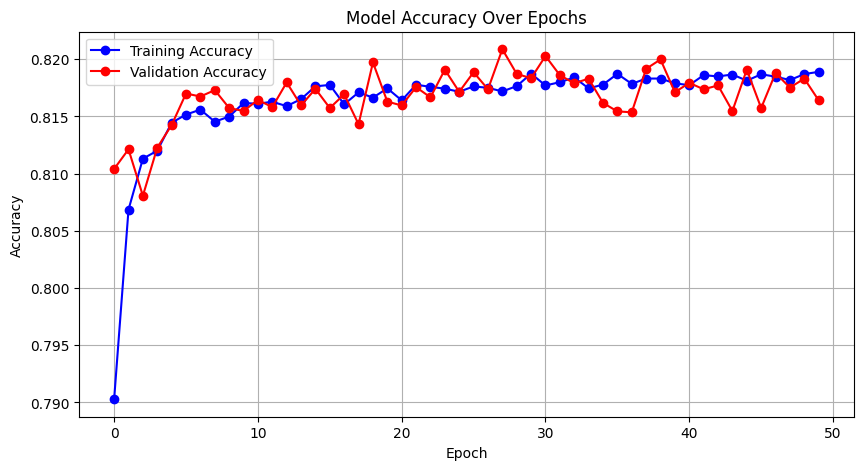

In [ ]:
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(history.history['accuracy'], linestyle='-', marker='o', color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], linestyle='-', marker='o', color='r', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


#### Try it with a real event :

In [ ]:
text_r = pd.DataFrame({'text': ['What a second half from Barca, Alba plays a one-two down the left wing with Griezmann and the left-back then pulls the ball back to Messi on the edge of the box, who attempts to fire it towards the bottom corner of the goal.']})

text_r = vectorizer.fit_transform(text_r['text'])
real_text_df = pd.DataFrame(text_r.toarray(), columns=vectorizer.get_feature_names_out())


real_x = pd.DataFrame({
    'time' : [72],
    'event_type' : [1],
    'side' : [1],
    'event_team' : ['FC barcelona'],
    'opponent' : ['Athletico Bilbao'],
    'player' : ['Lionel Messi'],
    'player2' : ['Jordi Alba'],
    'location' : [3],
    'bodypart' : [2],
    'situation' : [1]
})



real_x['event_team_hash'] = real_x['event_team'].apply(lambda x: hash_column(x))
real_x['opponent_hash'] = real_x['opponent'].apply(lambda x: hash_column(x))
real_x['player_hash'] = real_x['player'].apply(lambda x: hash_column(x))
real_x['player2_hash'] = real_x['player2'].apply(lambda x: hash_column(x))

real_x = real_x.drop(columns=['event_team','opponent','player','player2'])

real_x = pd.concat([real_x, real_text_df], axis=1)

real_x =scaler.fit_transform(real_x)



real_y = np.array([[1.0,0.0,0.0,0.0]])

In [ ]:
predicted_output = model2.predict(real_x)
print("Predicted Output:", predicted_output)

max_value_mask = predicted_output == np.max(predicted_output)
one_hot_encoded = max_value_mask.astype(int) 

print("Predicted Output:", one_hot_encoded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Output: [[0.3752591  0.51047915 0.24334498 0.00098214]]
Predicted Output: [[0 1 0 0]]


##### shot_outcome 
1	On target <br/>
2	Off target <br/>
3	Blocked <br/>
4	Hit the bar <br/>

## Conclusion:
##### The model is having around 48% accuracy without text features and around 82% accuracy with text features. I personally conclude that the dataset is really a quality one. May be because it has almost a million events, and almost 160K rows without empty data points, it is no surprise that it can predict with this much accuracy. 
##### Also the significant difference between both the models is because text-features might have very obvious features like (What a Shot, GOAL!, Good Strike etc) that may have increased the accuracy. Even though I tried to remove them using Find & replace. There still might be some that effects the model behaviour.


## Trying by removing obvious texts (Goal, What a shot, Good strike etc)
#### I tried the same model again by removing all the obvious texts from the commentary, i just wanna see how much tose texts are affecting the outcome. I followed through the same steps from above but I imported a different CSV file named events_new in which I tried to remove every possible obvious text that I could.

In [ ]:
file_path_updated = '/Users/hitheshmedavarapu/Desktop/TFproject/archive/events_new.csv'
df_updated = pd.read_csv(file_path_updated)
df_updated.sample(5)

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_,location,bodypart,assist_method,situation,fast_break
727619,08WhMpZn/,08WhMpZn121,121,90,Hand ball by Success (Granada CF).,10,NaN,2,Granada,Malaga,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
296339,252Xr6yj/,252Xr6yj10,10,12,Foul by Mauro Icardi (Sampdoria).,3,NaN,2,Sampdoria,Lazio,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
242816,byET9xWL/,byET9xWL12,12,14,Ronald Zubar (Ajaccio) wins a free kick in the...,8,NaN,1,AC Ajaccio,Bordeaux,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
417786,vJmIuyrd/,vJmIuyrd75,75,85,"Offside, Lorient. Gilles Sunu tries a through ...",9,13.0,2,Lorient,Marseille,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
721458,UcXbzJYF/,UcXbzJYF88,88,72,Foul by Theodor Gebre Selassie (SV Werder Brem...,3,NaN,2,Werder Bremen,FC Augsburg,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0


In [ ]:
df_updated = df_updated.drop(columns=['sort_order','id_event','id_odsp','is_','assist_method','player_in', 'player_out', 'event_type2','fast_break','shot_place'])
df_updated.shape

(941009, 12)

In [ ]:
target_updated = df_updated.iloc[:, 8]

attributes_updated = df_updated.drop(df_updated.columns[8], axis=1)

print("Features Preview:")
print(attributes_updated.head())
print("\nTarget Preview:")
print(target_updated.head())

Features Preview:
   time                                               text  event_type  side  \
0     2  Attempt . Mladen Petric (Hamburg) left footed ...           1     2   
1     4  Corner,  Borussia Dortmund. Conceded by Dennis...           2     1   
2     4  Corner,  Borussia Dortmund. Conceded by Heiko ...           2     1   
3     7           Foul by Sven Bender (Borussia Dortmund).           3     1   
4     7  Gokhan Tore (Hamburg) wins a free kick in the ...           8     2   

          event_team           opponent            player           player2  \
0         Hamburg SV  Borussia Dortmund     mladen petric       gokhan tore   
1  Borussia Dortmund         Hamburg SV  dennis diekmeier  dennis diekmeier   
2  Borussia Dortmund         Hamburg SV  heiko westermann  heiko westermann   
3  Borussia Dortmund         Hamburg SV       sven bender               NaN   
4         Hamburg SV  Borussia Dortmund       gokhan tore               NaN   

   location  bodypart  sit

In [ ]:
features_updated = attributes_updated
features_updated= features_updated.drop('text',axis=1)
features_updated.dropna()

,time,event_type,side,event_team,opponent,player,player2,location,bodypart,situation
0,2,1,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,9.0,2.0,1.0
11,14,1,1,Borussia Dortmund,Hamburg SV,shinji kagawa,mario gotze,15.0,1.0,1.0
13,17,1,1,Borussia Dortmund,Hamburg SV,kevin grosskreutz,mario gotze,9.0,2.0,1.0
18,25,1,1,Borussia Dortmund,Hamburg SV,shinji kagawa,lukasz piszczek,3.0,1.0,1.0
22,26,1,1,Borussia Dortmund,Hamburg SV,mats hummels,chris lowe,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...
940979,78,1,1,Atalanta,Sampdoria,ervin zukanovic,alejandro gomez,10.0,3.0,1.0
940991,84,1,1,Atalanta,Sampdoria,alberto grassi,remo freuler,15.0,1.0,1.0
940992,86,1,1,Atalanta,Sampdoria,alejandro gomez,andrea petagna,9.0,1.0,1.0
940993,87,1,2,Sampdoria,Atalanta,fabio quagliarella,luis muriel,15.0,1.0,1.0


In [ ]:

vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b', ngram_range=(1, 2), max_features=20)

In [ ]:
text_features_updated = vectorizer.fit_transform(attributes_updated['text'])
print(text_features_updated)
text_features_updated.shape 

  (0, 17)	0.31963795191211786
  (0, 4)	0.20391690080529182
  (0, 12)	0.2904275078473764
  (0, 3)	0.31538254102823665
  (0, 16)	0.6095751370769185
  (0, 9)	0.30485108328966487
  (0, 15)	0.3251527972225858
  (0, 2)	0.31967924627136496
  (1, 4)	1.0
  (2, 4)	1.0
  (3, 6)	0.6515244139394468
  (3, 5)	0.6170331277129177
  (3, 4)	0.44134573448224756
  (4, 11)	0.3343002638947183
  (4, 8)	0.33000517119002715
  (4, 1)	0.33273218464782833
  (4, 19)	0.3331660396764472
  (4, 10)	0.33429907515041873
  (4, 13)	0.33000113608263465
  (4, 7)	0.33000517119002715
  (4, 0)	0.2560756672457047
  (4, 18)	0.3331660396764472
  (4, 16)	0.22692556495495
  (5, 4)	1.0
  (6, 4)	1.0
  :	:
  (941004, 7)	0.33000517119002715
  (941004, 0)	0.2560756672457047
  (941004, 18)	0.3331660396764472
  (941004, 16)	0.22692556495495
  (941005, 4)	1.0
  (941006, 14)	0.31877319492202266
  (941006, 0)	0.22086818722583879
  (941006, 17)	0.3078935762127691
  (941006, 4)	0.19642443415614172
  (941006, 3)	0.3037945208050647
  (941006, 16)

(941009, 20)

In [ ]:
text_df_updated = pd.DataFrame(text_features_updated.toarray(), columns=vectorizer.get_feature_names_out())

# Reset the index of both DataFrames if they've been altered
attributes_updated.reset_index(drop=True, inplace=True)
text_df_updated.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames along columns
features_with_text_updated = pd.concat([attributes, text_df], axis=1)

In [ ]:
model2_updated = Sequential([
    Dense(128, activation='relu', input_shape=(30,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='sigmoid')
])

/Users/hitheshmedavarapu/Desktop/TFproject/tfvenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2_updated.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
features_with_text_updated['event_team_hash'] = features_with_text_updated['event_team'].apply(lambda x: hash_column(x))
features_with_text_updated['opponent_hash'] = features_with_text_updated['opponent'].apply(lambda x: hash_column(x))
features_with_text_updated['player_hash'] = features_with_text_updated['player'].apply(lambda x: hash_column(x))
features_with_text_updated['player2_hash'] = features_with_text_updated['player2'].apply(lambda x: hash_column(x))

features_with_text_updated = features_with_text_updated.drop(columns=['event_team','opponent','player','player2','text'])

features_with_text_updated.sample(5)

,time,event_type,side,location,bodypart,situation,a,assisted,assisted by,attempt,...,of the,right,shot,shot from,the,the box,event_team_hash,opponent_hash,player_hash,player2_hash
108362,73,1,1,15.0,2.0,1.0,0.000000,0.196056,0.196056,0.219535,...,0.000000,0.278486,0.241468,0.241468,0.394949,0.217857,6054,4596,9072,7821
63074,86,1,1,15.0,1.0,1.0,0.000000,0.184567,0.184567,0.206671,...,0.000000,0.524334,0.227318,0.227318,0.371806,0.205091,1582,6025,9950,4857
136988,11,1,2,15.0,1.0,1.0,0.000000,0.222172,0.222172,0.248780,...,0.000000,0.315583,0.273634,0.273634,0.223780,0.246878,6117,998,2984,2097
67679,55,1,1,12.0,1.0,2.0,0.501021,0.138254,0.138254,0.154812,...,0.203733,0.392765,0.170278,0.170278,0.417765,0.000000,8451,992,2901,8164
920,82,1,1,9.0,1.0,1.0,0.000000,0.147409,0.147409,0.165063,...,0.217223,0.209386,0.181553,0.181553,0.445428,0.163801,336,6900,217,5946


In [ ]:
features_with_text_updated = scaler.fit_transform(features_with_text_updated)

In [ ]:
X_updated = features_with_text_updated
y_updated = target_encoded

X_train, X_test, y_train, y_test = train_test_split(X_updated, y_updated, test_size=0.2, random_state=42)

In [ ]:
history = model2_updated.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step - accuracy: 0.7493 - loss: 0.5389 - val_accuracy: 0.8041 - val_loss: 0.3548
Epoch 2/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.8090 - loss: 0.3640 - val_accuracy: 0.8156 - val_loss: 0.3490
Epoch 3/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.8125 - loss: 0.3558 - val_accuracy: 0.8155 - val_loss: 0.3461
Epoch 4/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.8113 - loss: 0.3541 - val_accuracy: 0.8126 - val_loss: 0.3471
Epoch 5/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.8145 - loss: 0.3509 - val_accuracy: 0.8149 - val_loss: 0.3452
Epoch 6/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.8142 - loss: 0.3486 - val_accuracy: 0.8120 - val_loss: 0.3443
Epoch 7/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.8168 - loss: 0.3473 - val_accuracy: 0.8171 - val_loss: 0.3427
Epoch 8/50
1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.8166 -

In [ ]:
results = model2_updated.evaluate(X_test, y_test)
print(f"Loss: {results[0]}, Accuracy: {results[1]}")

1049/1049 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - accuracy: 0.8180 - loss: 0.3424
Loss: 0.3436741530895233, Accuracy: 0.8176102638244629


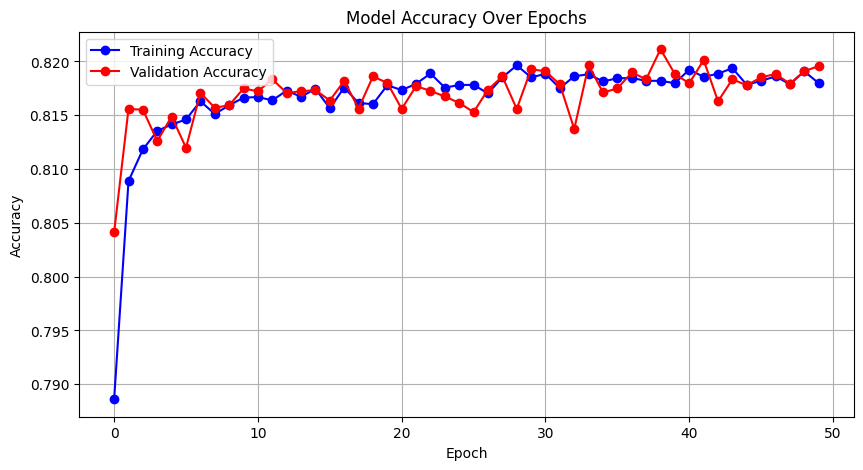

In [ ]:
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(history.history['accuracy'], linestyle='-', marker='o', color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], linestyle='-', marker='o', color='r', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


## Conclusion 2.0:
#### So, even if i tried to remove all the obvious texts, I am getting the same accuracy. And even the little dips in the validation graph are also the same, so I think its more about statistical patterns, complexity and style of the texts rather than the obvious words.